**Polarity Definition**: Polarity refers to the emotional tone of the text, determining how positive or negative it is.

Range: The polarity value ranges from -1.0 to +1.0.

-1.0: Extremely negative sentiment (e.g., "I hate this. It’s terrible.").
0.0: Neutral sentiment (e.g., "This is a book.").
+1.0: Extremely positive sentiment (e.g., "I love this. It’s amazing.").

**Subjectivity Definition**: Subjectivity quantifies how much a piece of text is subjective (opinion-based) or objective (fact-based).

Range: The subjectivity value ranges from 0.0 to 1.0.

0.0: Completely objective (e.g., "The sky is blue." – a fact).
1.0: Completely subjective (e.g., "I think this is the best day ever!" – an opinion).

In [ ]:
#!pip3 install textblob
from textblob import TextBlob

article_text_trump = "Happy Thanksgiving to all, including to the Radical Left Lunatics who have worked so hard to destroy our Country, but who have miserably failed, and will always fail, because their ideas and policies are so hopelessly bad that the great people of our Nation just gave a landslide victory to those who want to MAKE AMERICA GREAT AGAIN! Don’t worry, our Country will soon be respected, productive, fair, and strong, and you will be, more than ever before, proud to be an American!"
article_text = ""
# Analyze sentiment
sentiment = TextBlob(article_text).sentiment
print(sentiment)

Sentiment(polarity=0.20297619047619048, subjectivity=0.531547619047619)


## Political compass

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Preprocess article text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove numbers
    text = ''.join(word for word in text if not word.isdigit())
    # Remove punctuation
    text = ''.join(word for word in text if word not in string.punctuation)
    # Remove stop words

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join(word for word in word_tokens if word not in stop_words)
    return text

cleaned_text = preprocess_text(article_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ewa.miazga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ewa.miazga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ewa.miazga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [9]:
cleaned_text

'happy thanksgiving including radical left lunatics worked hard destroy country miserably failed always fail ideas policies hopelessly bad great people nation gave landslide victory want make america great ’ worry country soon respected productive fair strong ever proud american'

In [15]:
keyword_dict = {
    # Economic Left Keywords (e.g., socialism, labor rights, progressive policies)
    'economic_left': [
        'redistribution', 'workers', 'labor rights', 'collective bargaining',
        'unionize', 'public ownership', 'wealth tax', 'universal healthcare',
        'free college', 'anti-corporate', 'eat the rich', 'living wage',
        'minimum wage', 'climate justice', 'green new deal', 'tax the rich',
        'capitalism is broken', 'medicare for all', 'socialism', '#fightfor15',
        'anti-capitalist', 'progressive tax', 'public housing', 'income equality',
        'abolish billionaires', 'corporate greed', '#NoMoreBillionaires',
        'people over profits', 'end student debt', 'guaranteed income',
        'fair trade', 'basic income', 'universal basic income', 'free healthcare',
        '#wealthgap', '#livingwage', '#breakupbigtech'
    ],

    # Economic Right Keywords (e.g., capitalism, free market, deregulation)
    'economic_right': [
        'free market', 'capitalism', 'deregulation', 'tax cuts', 'limited government',
        'individual responsibility', 'private property', 'private sector',
        'corporate freedom', 'trickle-down economics', 'small business',
        'economic freedom', 'entrepreneurship', 'job creators', '#freetrade',
        'flat tax', 'privatization', 'self-reliance', 'personal responsibility',
        '#defundwelfare', 'pro-business', 'free enterprise', '#cutregulations',
        'business-friendly', 'pro-growth policies', 'small government',
        'pro-capitalism', 'limited regulation', 'free trade agreements',
        '#TaxCutsWork', 'less government', '#cuttaxes', '#lowtaxes', 'wealth creation'
    ],

    # Social Libertarian Keywords (e.g., individual freedoms, civil liberties)
    'social_libertarian': [
        'freedom of speech', 'civil liberties', 'privacy rights', 'personal freedom',
        'human rights', 'net neutrality', 'anti-censorship', 'free expression',
        'body autonomy', 'right to choose', 'equal rights', '#prochoice', 
        '#freedom', 'government overreach', 'marijuana legalization', 
        'LGBTQ+ rights', 'abolish ICE', 'police reform', 'criminal justice reform',
        'prison reform', 'legalize weed', 'end mass surveillance', 'anti-patriot act',
        'free press', 'free assembly', 'digital freedom', 'anti-police brutality',
        '#NoToSurveillance', 'gender equality', 'racial equality',
        'abolish the police', '#BlackLivesMatter', '#DefundThePolice', 
        'abolish prisons', 'trans rights', 'privacy protection',
        'immigration rights', '#EqualityForAll', '#OpenBorders', 
        '#NoHumanIsIllegal', 'freedom to marry', 'equal pay'
    ],

    # Social Authoritarian Keywords (e.g., law and order, strong government control)
    'social_authoritarian': [
        'law and order', 'strong borders', 'border security', 'national sovereignty',
        'patriotism', 'traditional values', 'family values', 'national security',
        'pro-life', 'anti-abortion', '#BackTheBlue', '#BlueLivesMatter',
        'strong leadership', 'military strength', 'death penalty', 'zero tolerance',
        'cultural heritage', 'anti-LGBTQ+', 'drug prohibition', '#prolife',
        'religious freedom', 'moral values', 'defend the constitution',
        'patriotic education', 'censorship for safety', 'restore law and order',
        'ban CRT', 'close the borders', 'secure the wall', 'immigration control',
        '#DeportThemAll', '#BuildTheWall', 'traditional marriage',
        'religious values', 'meritocracy', 'defense budget', 
        'defend Christianity', 'parental rights', 'patriotic values', 
        '#AmericanFirst', 'cultural preservation', 'anti-globalism'
    ],

    # Hashtags Related to Political Ideologies
    'hashtags': {
        'economic_left': [
            '#Socialism', '#EatTheRich', '#TaxTheRich', '#Progressive',
            '#MedicareForAll', '#UniversalHealthcare', '#GreenNewDeal',
            '#CancelStudentDebt', '#AbolishBillionaires', '#EndCapitalism',
            '#WorkersRights', '#UnionStrong', '#RaiseTheWage', '#PeopleOverProfit',
            '#BreakUpBigTech', '#DemocraticSocialism'
        ],
        'economic_right': [
            '#Capitalism', '#FreeMarket', '#TaxCuts', '#SmallGovernment',
            '#ProBusiness', '#Entrepreneurship', '#EconomicFreedom',
            '#SelfReliance', '#DefundWelfare', '#CutRegulations', '#JobCreators',
            '#FlatTax', '#WealthCreation', '#ProGrowth', '#TrickleDown'
        ],
        'social_libertarian': [
            '#ProChoice', '#Freedom', '#EqualityForAll', '#BlackLivesMatter',
            '#DefundThePolice', '#EndMassSurveillance', '#LGBTQRights',
            '#AbolishICE', '#PrisonReform', '#HumanRights', '#DigitalFreedom',
            '#FreeSpeech', '#NoToCensorship', '#TransRightsAreHumanRights',
            '#MarijuanaLegalization', '#NetNeutrality'
        ],
        'social_authoritarian': [
            '#BackTheBlue', '#BlueLivesMatter', '#ProLife', '#BuildTheWall',
            '#SecureTheBorder', '#LawAndOrder', '#TraditionalValues',
            '#FamilyValues', '#ReligiousFreedom', '#Patriotism', '#BanCRT',
            '#CloseTheBorders', '#DeportThemAll', '#Meritocracy', '#ChristianValues',
            '#DefendTheConstitution', '#AmericaFirst', '#StrongBorders'
        ]
    }
}


In [16]:
def calculate_political_scores(text_tokens, keyword_dict):
    scores = {'economic': 0, 'social': 0}
    
    for token in text_tokens:
        if token in keyword_dict['economic_left']:
            scores['economic'] -= 1
        elif token in keyword_dict['economic_right']:
            scores['economic'] += 1
        elif token in keyword_dict['social_libertarian']:
            scores['social'] -= 1
        elif token in keyword_dict['social_authoritarian']:
            scores['social'] += 1
    
    return scores
\
# Calculate scores
scores = calculate_political_scores(cleaned_text, keyword_dict)
print(scores)

{'economic': 0, 'social': 0}


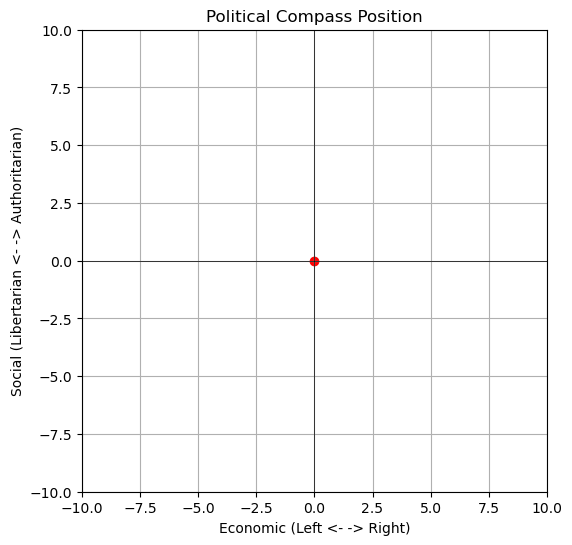

In [14]:
import matplotlib.pyplot as plt

# Plot political compass
def plot_political_compass(economic, social):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.scatter(economic, social, color='red')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('Economic (Left <- -> Right)')
    plt.ylabel('Social (Libertarian <- -> Authoritarian)')
    plt.title('Political Compass Position')
    plt.grid()
    plt.show()

plot_political_compass(scores['economic'], scores['social'])

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

text = cleaned_text

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")


inputs = tokenizer(text, return_tensors="pt")
labels = torch.tensor([0])
outputs = model(**inputs, labels=labels)
loss, logits = outputs[:2]

# [0] -> left 
# [1] -> center
# [2] -> right
print(logits.softmax(dim=-1)[0].tolist()) 

[0.43567439913749695, 0.21199631690979004, 0.352329283952713]


# Sentiment analysis

In [27]:
!pip3 install pysentimiento
#emotion_analyzer = create_analyzer(task="emotion", lang="en")

In [32]:
from pysentimiento import create_analyzer
emotion_analyzer = create_analyzer(task="emotion", lang="en")


RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
'skip_parameter_validation'

In [ ]:
emotion_analyzer = create_analyzer(task="emotion", lang="en")
emotion_analyzer.predict("This is so terrible...")

In [ ]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="en")
hate_speech_analyzer.predict("I hate you")

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="en")
analyzer.predict("I love this!")